In [1]:
import keras
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten


> # **Load MNIST DataSet**

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [3]:
x_train=x_train/255
x_test=x_test/255

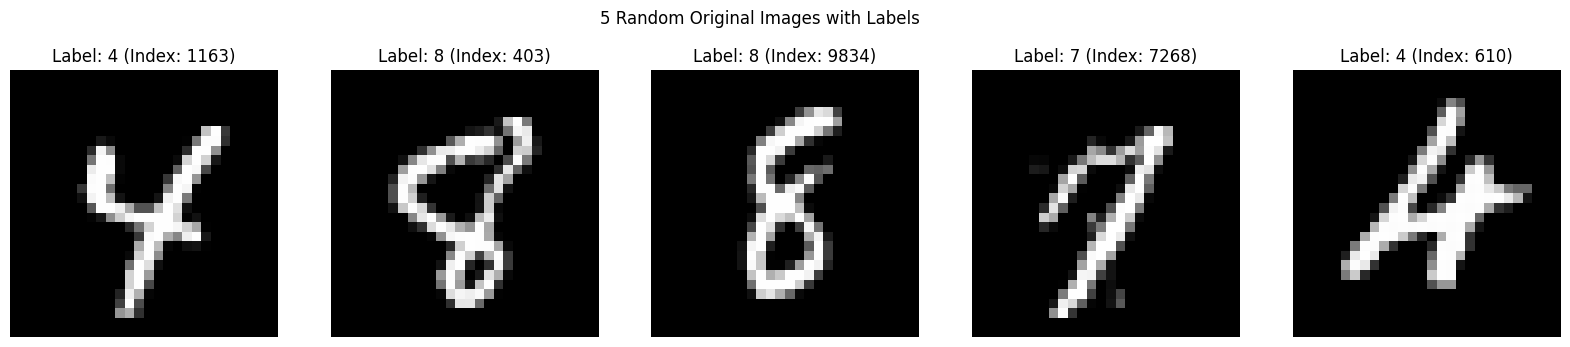

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Number of random images to display
n_display = 5

plt.figure(figsize=(20, 4))
for i in range(n_display):
    # Get a random index from the test set
    random_index = np.random.randint(0, len(x_test_cnn))

    # Get the original image and its label
    random_image = x_test_cnn[random_index].reshape(28, 28)
    image_label = y_test[random_index]

    ax = plt.subplot(1, n_display, i + 1)
    plt.imshow(random_image, cmap='gray')
    plt.title(f'Label: {image_label} (Index: {random_index})')
    plt.axis('off')

plt.suptitle('5 Random Original Images with Labels')
plt.show()

># **CNN MINIST Model**

In [ ]:
model=Sequential()
model.add(Conv2D(64, (3, 3), activation='relu',padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2)))

model.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369,664 (1.41 MB)

 Trainable params: 369,664 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,683,722 (6.42 MB)

 Trainable params: 1,683,722 (6.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
results = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8688 - loss: 0.3898 - val_accuracy: 0.9857 - val_loss: 0.0466
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9879 - loss: 0.0387 - val_accuracy: 0.9912 - val_loss: 0.0289
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9919 - loss: 0.0250 - val_accuracy: 0.9916 - val_loss: 0.0268
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9938 - loss: 0.0193 - val_accuracy: 0.9887 - val_loss: 0.0336
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9943 - loss: 0.0174 - val_accuracy: 0.9923 - val_loss: 0.0250
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9961 - loss: 0.0126 - val_accuracy: 0.9871 - val_loss: 0.0443
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9952 - loss: 0.0138 - val_accuracy: 0.9921 - val_loss: 0.0290
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9971 - loss: 0.0094 - val_ac

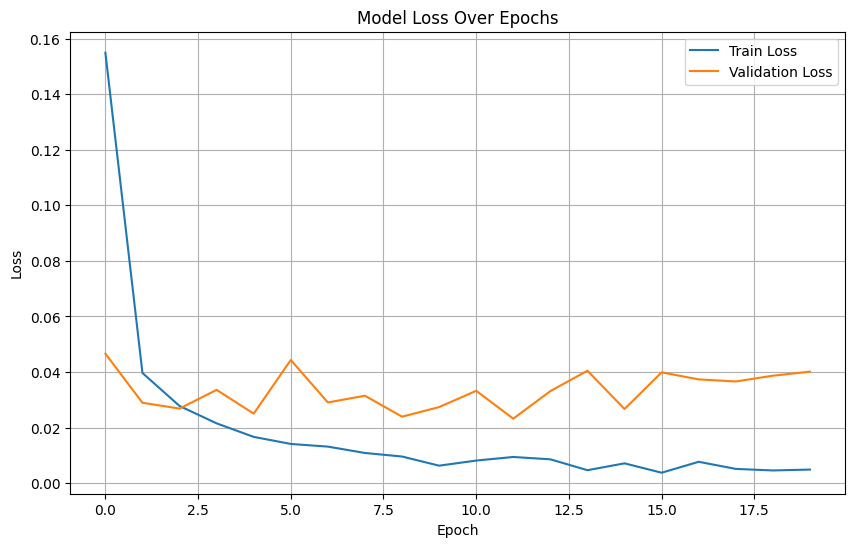

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(results.history['loss'], label='Train Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

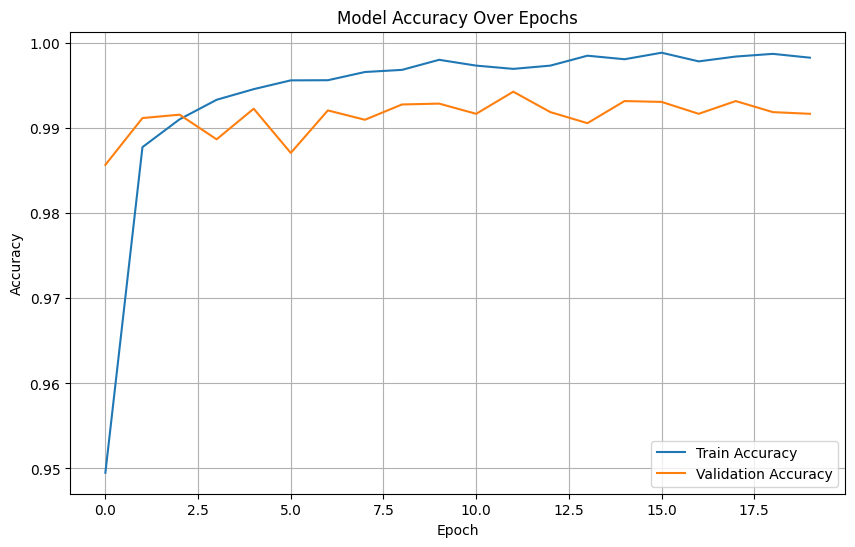

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(results.history['accuracy'], label='Train Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred_probs = model.predict(x_test)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      1.00      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



> # **AutoEncoder MLP model (MINIST) without Noise**

In [ ]:
import numpy as np

# Reshape x_train and x_test for MLP
x_train_flat = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_flat = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(f"Reshaped x_train_flat shape: {x_train_flat.shape}")
print(f"Reshaped x_test_flat shape: {x_test_flat.shape}")

Reshaped x_train_flat shape: (60000, 784)
Reshaped x_test_flat shape: (10000, 784)


In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# Define input dimension (28 * 28 = 784)
input_dim = x_train_flat.shape[1]
encoding_dim = 32  # Dimension of the latent space

# Encoder
input_img = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoder_output = Dense(encoding_dim, activation='relu')(encoded)

# Decoder
decoded = Dense(64, activation='relu')(encoder_output)
decoded = Dense(128, activation='relu')(decoded)
decoder_output = Dense(input_dim, activation='sigmoid')(decoded) # Sigmoid for pixel values between 0 and 1

# Autoencoder model
autoencoder = Model(input_img, decoder_output)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.3410 - val_loss: 0.1659
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1567 - val_loss: 0.1368
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1347 - val_loss: 0.1247
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1245 - val_loss: 0.1182
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1176 - val_loss: 0.1125
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1129 - val_loss: 0.1088
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1093 - val_loss: 0.1058
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1063 - val_loss: 0.1038
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1041 - val_loss: 0.1021
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1023 - val_loss: 0.0998
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1004 - val_loss: 0.0986
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/ste

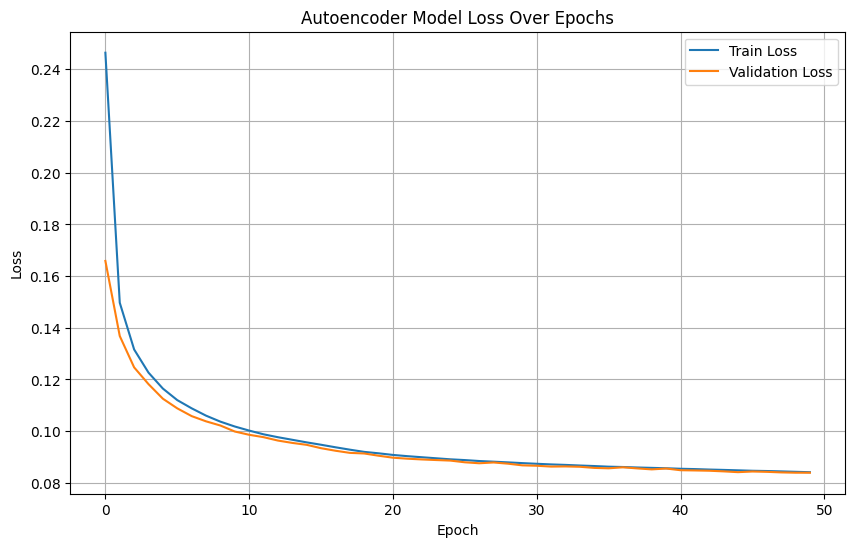

In [ ]:
epochs = 50
batch_size = 256

history_autoencoder = autoencoder.fit(x_train_flat, x_train_flat, # Input and target are the same
                                      epochs=epochs,
                                      batch_size=batch_size,
                                      shuffle=True,
                                      validation_data=(x_test_flat, x_test_flat))

# Plot training & validation loss values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history_autoencoder.history['loss'], label='Train Loss')
plt.plot(history_autoencoder.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


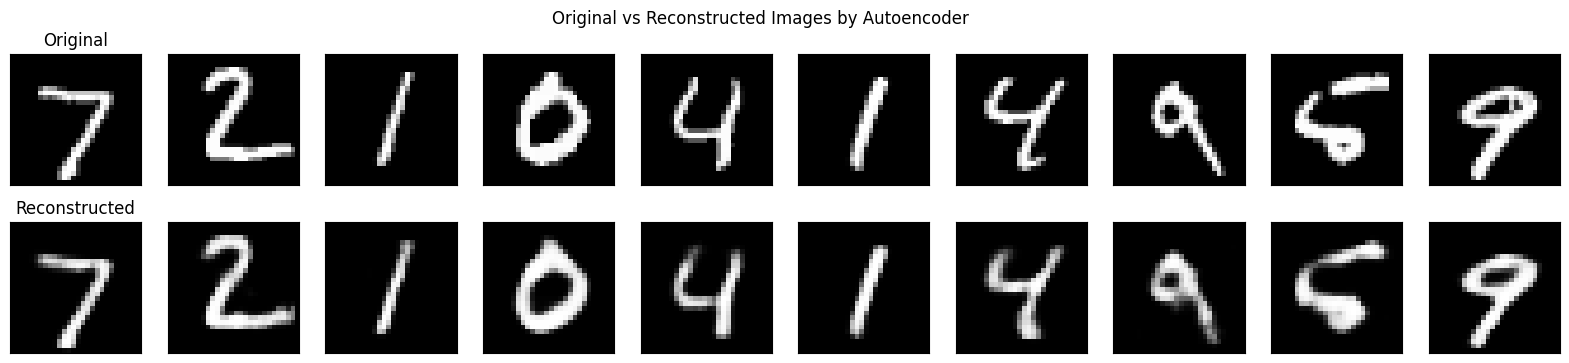

In [ ]:
import matplotlib.pyplot as plt

# Use the autoencoder to reconstruct images from the test set
reconstructed_images = autoencoder.predict(x_test_flat)

# Number of images to display
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_flat[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Original')

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Reconstructed')
plt.suptitle('Original vs Reconstructed Images by Autoencoder')
plt.show()

> # **AutoEncoder MLP model (MINIST) with Noise**

In [ ]:
import numpy as np

# Reshape x_train and x_test for MLP, if not already done for the denoising autoencoder
# Ensure x_train and x_test are flattened for the MLP-based autoencoder input
x_train_flat_denoise = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_flat_denoise = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train_flat_denoise + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_flat_denoise.shape)
x_test_noisy = x_test_flat_denoise + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_flat_denoise.shape)

# Clip values to stay within [0, 1] range after adding noise
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(f"Noisy x_train shape: {x_train_noisy.shape}")
print(f"Noisy x_test shape: {x_test_noisy.shape}")

Noisy x_train shape: (60000, 784)
Noisy x_test shape: (10000, 784)


In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# Define input dimension (28 * 28 = 784)
input_dim_denoise = x_train_flat_denoise.shape[1]
encoding_dim_denoise = 32  # Dimension of the latent space

# Encoder
input_img_denoise = Input(shape=(input_dim_denoise,))
encoded_denoise = Dense(128, activation='relu')(input_img_denoise)
encoded_denoise = Dense(64, activation='relu')(encoded_denoise)
encoder_output_denoise = Dense(encoding_dim_denoise, activation='relu')(encoded_denoise)

# Decoder
decoded_denoise = Dense(64, activation='relu')(encoder_output_denoise)
decoded_denoise = Dense(128, activation='relu')(decoded_denoise)
decoder_output_denoise = Dense(input_dim_denoise, activation='sigmoid')(decoded_denoise) # Sigmoid for pixel values between 0 and 1

# Denoising Autoencoder model: input is noisy, output is clean
denoising_autoencoder = Model(input_img_denoise, decoder_output_denoise)

# Compile the autoencoder
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

denoising_autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.3292 - val_loss: 0.1938
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1864 - val_loss: 0.1681
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1644 - val_loss: 0.1552
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1544 - val_loss: 0.1482
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1474 - val_loss: 0.1440
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1437 - val_loss: 0.1410
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1408 - val_loss: 0.1384
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1382 - val_loss: 0.1361
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1359 - val_loss: 0.1341
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1339 - val_loss: 0.1326
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1319 - val_loss: 0.1318
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/ste

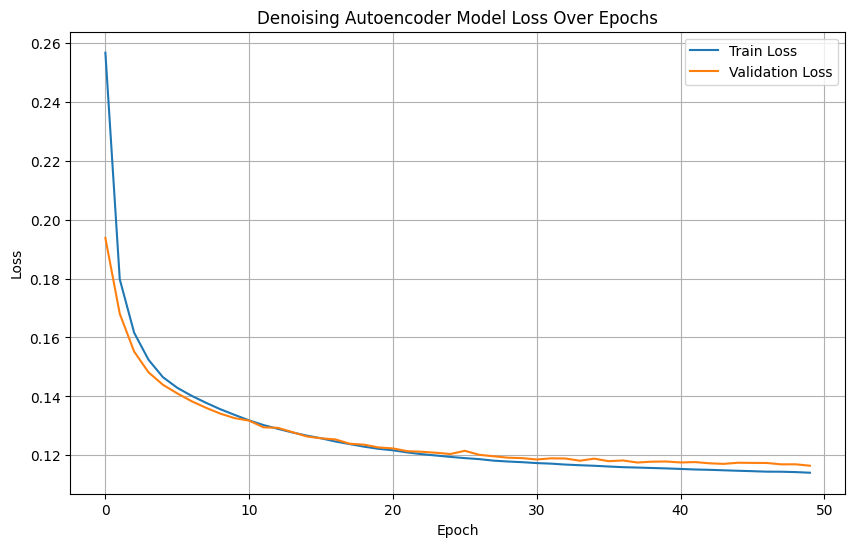

In [ ]:
epochs_denoise = 50
batch_size_denoise = 256

history_denoising_autoencoder = denoising_autoencoder.fit(x_train_noisy, x_train_flat_denoise, # Input is noisy, target is clean
                                                          epochs=epochs_denoise,
                                                          batch_size=batch_size_denoise,
                                                          shuffle=True,
                                                          validation_data=(x_test_noisy, x_test_flat_denoise))

# Plot training & validation loss values for denoising autoencoder
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history_denoising_autoencoder.history['loss'], label='Train Loss')
plt.plot(history_denoising_autoencoder.history['val_loss'], label='Validation Loss')
plt.title('Denoising Autoencoder Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


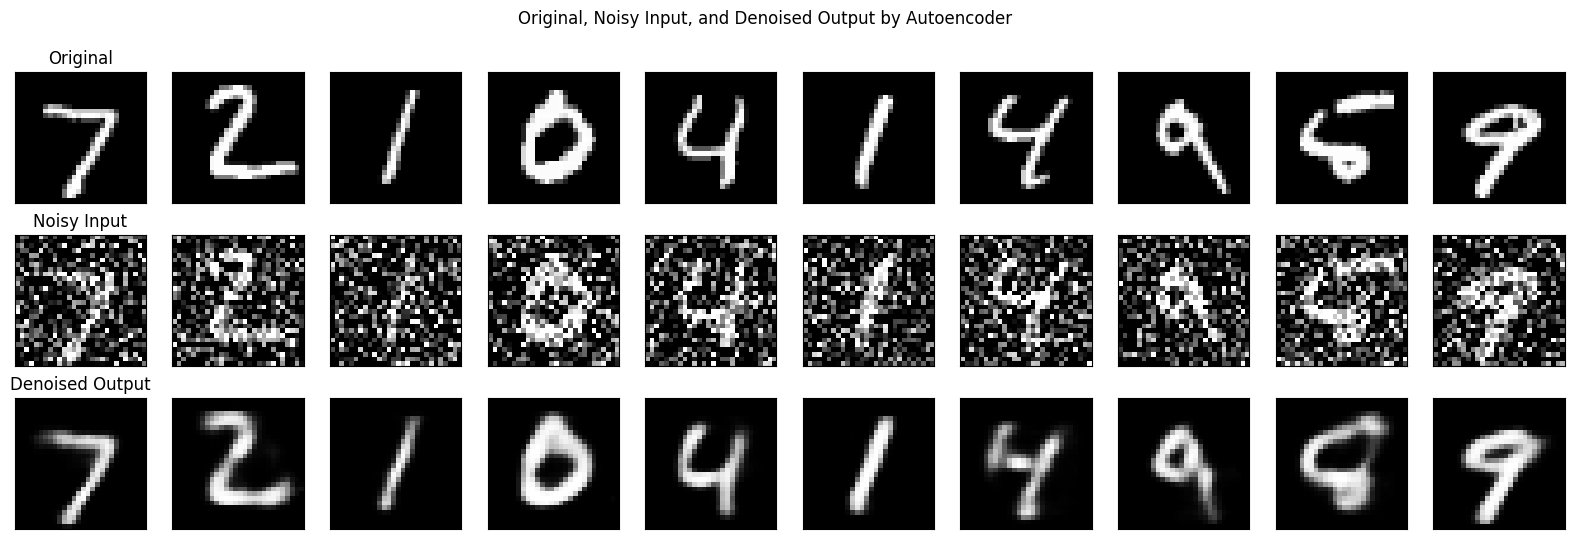

In [ ]:
import matplotlib.pyplot as plt

# Use the denoising autoencoder to reconstruct (denoise) images from the noisy test set
denoised_images = denoising_autoencoder.predict(x_test_noisy)

# Number of images to display
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_flat_denoise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Original')

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Noisy Input')

    # Denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Denoised Output')
plt.suptitle('Original, Noisy Input, and Denoised Output by Autoencoder')
plt.show()

> # **AutoEncoder CNN model (MINIST) without Noise**

### CNN Autoencoder

In [4]:
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# Reshape data to include channel dimension (1 for grayscale)
x_train_cnn = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_cnn = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(f"x_train_cnn shape: {x_train_cnn.shape}")
print(f"x_test_cnn shape: {x_test_cnn.shape}")

x_train_cnn shape: (60000, 28, 28, 1)
x_test_cnn shape: (10000, 28, 28, 1)


In [5]:
# Encoder
input_img_cnn = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img_cnn)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded_cnn = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_cnn)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded_cnn = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
cnn_autoencoder = Model(input_img_cnn, decoded_cnn)

# Compile the autoencoder
cnn_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

cnn_autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,353 (110.75 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.2219 - val_loss: 0.0750
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0746 - val_loss: 0.0712
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0714 - val_loss: 0.0695
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0698 - val_loss: 0.0685
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0688 - val_loss: 0.0677
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0683 - val_loss: 0.0671
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0676 - val_loss: 0.0667
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0670 - val_loss: 0.0663
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0668 - val_loss: 0.0659
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0663 - val_loss: 0.0658


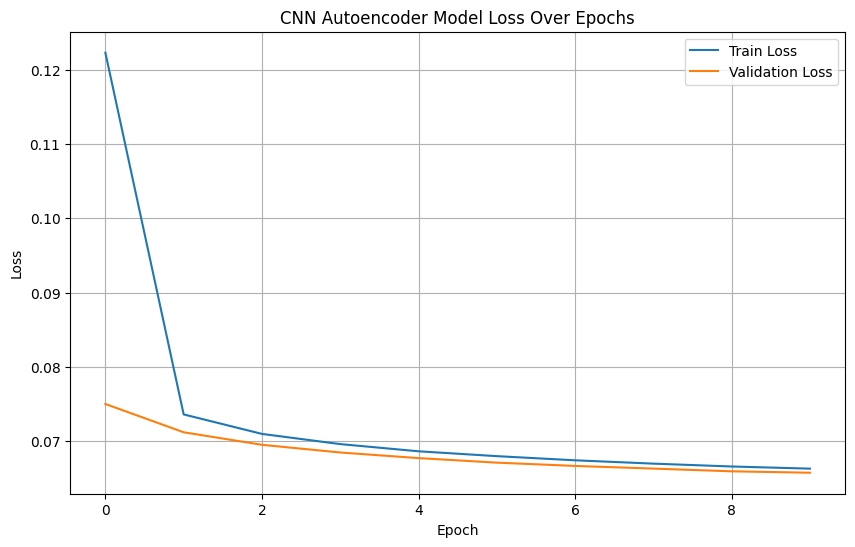

In [6]:
epochs_cnn = 10
batch_size_cnn = 128

history_cnn_autoencoder = cnn_autoencoder.fit(x_train_cnn, x_train_cnn,
                                              epochs=epochs_cnn,
                                              batch_size=batch_size_cnn,
                                              shuffle=True,
                                              validation_data=(x_test_cnn, x_test_cnn))

# Plot training & validation loss values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history_cnn_autoencoder.history['loss'], label='Train Loss')
plt.plot(history_cnn_autoencoder.history['val_loss'], label='Validation Loss')
plt.title('CNN Autoencoder Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


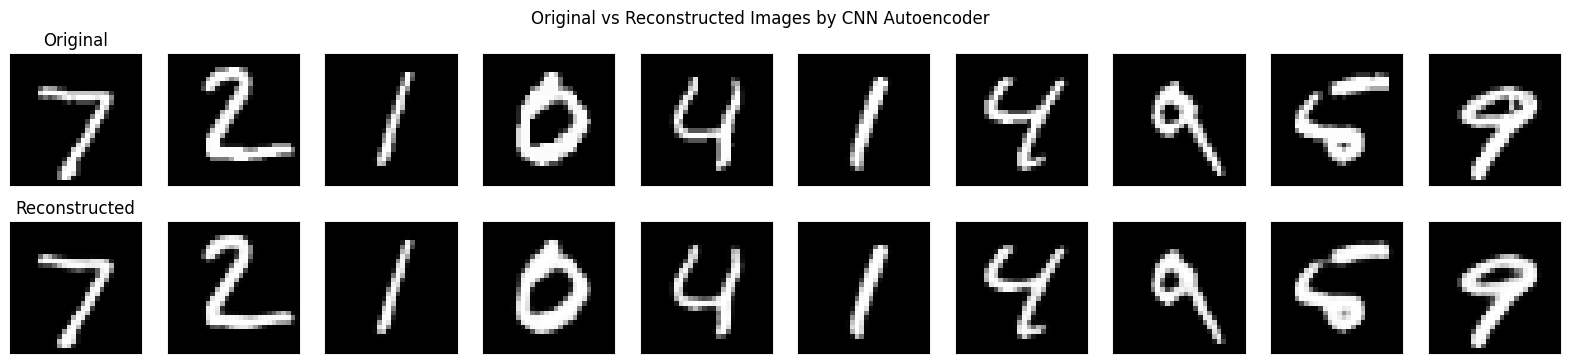

In [7]:
import matplotlib.pyplot as plt

# Use the CNN autoencoder to reconstruct images from the test set
reconstructed_images_cnn = cnn_autoencoder.predict(x_test_cnn)

# Number of images to display
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_cnn[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Original')

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images_cnn[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Reconstructed')
plt.suptitle('Original vs Reconstructed Images by CNN Autoencoder')
plt.show()

> # **AutoEncoder CNN model (MINIST) with Noise**

### Denoising CNN Autoencoder

In [8]:
import numpy as np

# Add noise to the CNN data
noise_factor_cnn = 0.5
x_train_noisy_cnn = x_train_cnn + noise_factor_cnn * np.random.normal(loc=0.0, scale=1.0, size=x_train_cnn.shape)
x_test_noisy_cnn = x_test_cnn + noise_factor_cnn * np.random.normal(loc=0.0, scale=1.0, size=x_test_cnn.shape)

# Clip values to stay within [0, 1] range after adding noise
x_train_noisy_cnn = np.clip(x_train_noisy_cnn, 0., 1.)
x_test_noisy_cnn = np.clip(x_test_noisy_cnn, 0., 1.)

print(f"Noisy x_train_cnn shape: {x_train_noisy_cnn.shape}")
print(f"Noisy x_test_cnn shape: {x_test_noisy_cnn.shape}")

Noisy x_train_cnn shape: (60000, 28, 28, 1)
Noisy x_test_cnn shape: (10000, 28, 28, 1)


In [9]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# Encoder for Denoising CNN Autoencoder
input_img_denoise_cnn = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img_denoise_cnn)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded_denoise_cnn = MaxPooling2D((2, 2), padding='same')(x)

# Decoder for Denoising CNN Autoencoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_denoise_cnn)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded_denoise_cnn = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Denoising CNN Autoencoder model: input is noisy, output is clean
denoising_cnn_autoencoder = Model(input_img_denoise_cnn, decoded_denoise_cnn)

# Compile the autoencoder
denoising_cnn_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

denoising_cnn_autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,353 (110.75 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.2400 - val_loss: 0.1172
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1162 - val_loss: 0.1091
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1094 - val_loss: 0.1055
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1058 - val_loss: 0.1029
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1036 - val_loss: 0.1024
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1023 - val_loss: 0.1007
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.1009 - val_loss: 0.1000
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1002 - val_loss: 0.0989
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0993 - val_loss: 0.0983
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0988 - val_loss: 0.0976


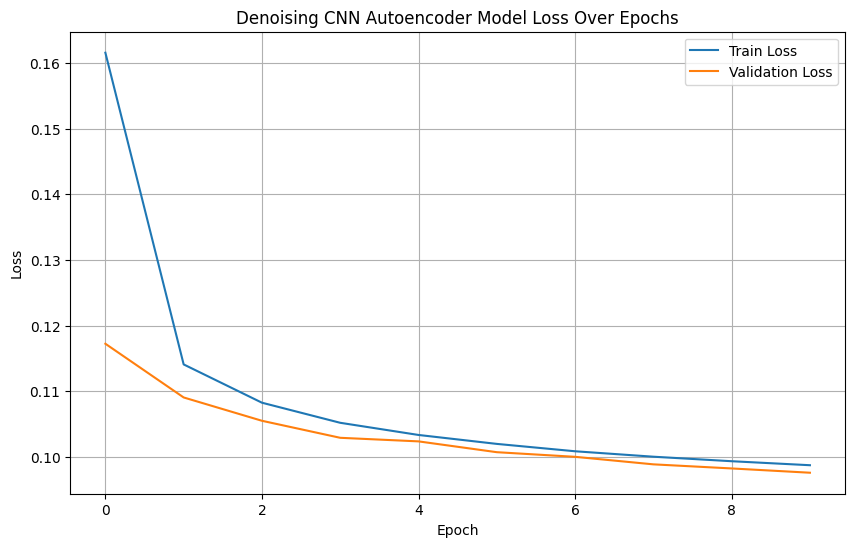

In [10]:
epochs_denoise_cnn = 10
batch_size_denoise_cnn = 128

history_denoising_cnn_autoencoder = denoising_cnn_autoencoder.fit(x_train_noisy_cnn, x_train_cnn, # Input is noisy, target is clean
                                                                  epochs=epochs_denoise_cnn,
                                                                  batch_size=batch_size_denoise_cnn,
                                                                  shuffle=True,
                                                                  validation_data=(x_test_noisy_cnn, x_test_cnn))

# Plot training & validation loss values for denoising CNN autoencoder
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history_denoising_cnn_autoencoder.history['loss'], label='Train Loss')
plt.plot(history_denoising_cnn_autoencoder.history['val_loss'], label='Validation Loss')
plt.title('Denoising CNN Autoencoder Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


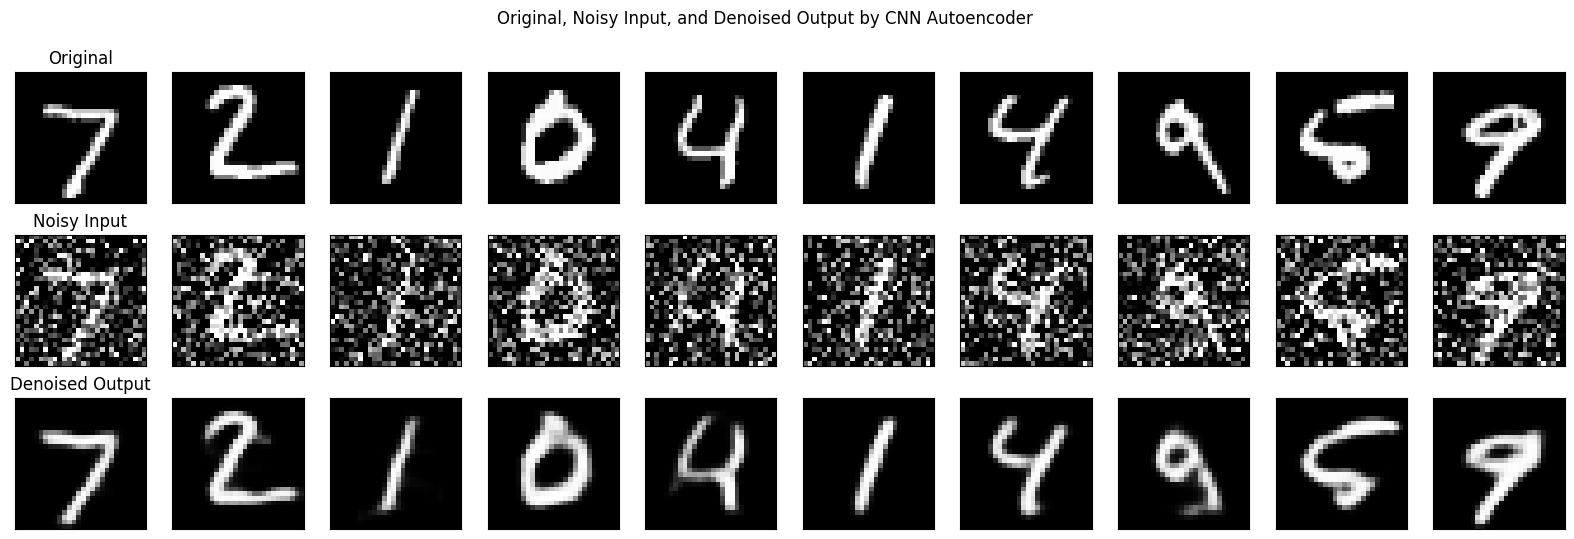

In [11]:
import matplotlib.pyplot as plt

# Use the denoising CNN autoencoder to reconstruct (denoise) images from the noisy test set
denoised_images_cnn = denoising_cnn_autoencoder.predict(x_test_noisy_cnn)

# Number of images to display
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_cnn[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Original')

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy_cnn[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Noisy Input')

    # Denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_images_cnn[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Denoised Output')
plt.suptitle('Original, Noisy Input, and Denoised Output by CNN Autoencoder')
plt.show()